# Experimento 4 - Órdenes Repetitivas

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import sys

sys.path.append("../..")

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Use latex
plt.rc("text", usetex=True)

## Definiciones

In [3]:
from experimento import Experimento
from src.generacion import (
    GeneradorInstancias,
    DistribucionIndependiente,
    DistribucionUniforme,
    DistribucionNormal,
)
from src.modelo.modelo import ConfiguracionAsignacionCuadrillas
from src.modelo.restricciones_deseables import (
    EvitarRepeticiones,
    IgnorarRepeticiones,
    MultarRepeticiones,
)


generador = GeneradorInstancias(
    cantidad_trabajadores=DistribucionUniforme(5, 10),
    cantidad_ordenes=DistribucionUniforme(5, 20),
    parametros_ordenes=DistribucionIndependiente(
        DistribucionNormal(10000, 2000),
        DistribucionUniforme(3, 10),
    ),
    cantidad_ordenes_repetitivas=DistribucionUniforme(2, 10),
)

N = 1000
instancias = [generador.generar_instancia() for _ in range(N)]

In [4]:
experimento_ignorar = Experimento(
    nombre="exp4-ignorar",
    instancias=instancias,
    configuracion_modelo=ConfiguracionAsignacionCuadrillas(
        estrategia_repetitiva=IgnorarRepeticiones(),
    ),
)

In [5]:
experimento_evitar = Experimento(
    nombre="exp4-evitar",
    instancias=instancias,
    configuracion_modelo=ConfiguracionAsignacionCuadrillas(
        estrategia_repetitiva=EvitarRepeticiones(),
    ),
)

In [6]:
experimento_multa_baja = Experimento(
    nombre="exp4-multa-baja",
    instancias=instancias,
    configuracion_modelo=ConfiguracionAsignacionCuadrillas(
        estrategia_repetitiva=MultarRepeticiones(penalizacion=500),
    ),
)

In [7]:
experimento_multa_alta = Experimento(
    nombre="exp4-multa-alta",
    instancias=instancias,
    configuracion_modelo=ConfiguracionAsignacionCuadrillas(
        estrategia_repetitiva=MultarRepeticiones(penalizacion=3000),
    ),
)

## Ejecución

In [8]:
resultados_ignorar = experimento_ignorar.ejecutar()

In [9]:
resultados_evitar = experimento_evitar.ejecutar()

In [10]:
resultados_multa_baja = experimento_multa_baja.ejecutar()

In [11]:
resultados_multa_alta = experimento_multa_alta.ejecutar()

In [16]:
dict_resultados = {
    "Ignorar": resultados_ignorar,
    "Evitar": resultados_evitar,
    "Multa baja": resultados_multa_baja,
    "Multa alta": resultados_multa_alta,
}

## Análisis

In [12]:
from graficos import boxplot

### Distribución Función Objetivo

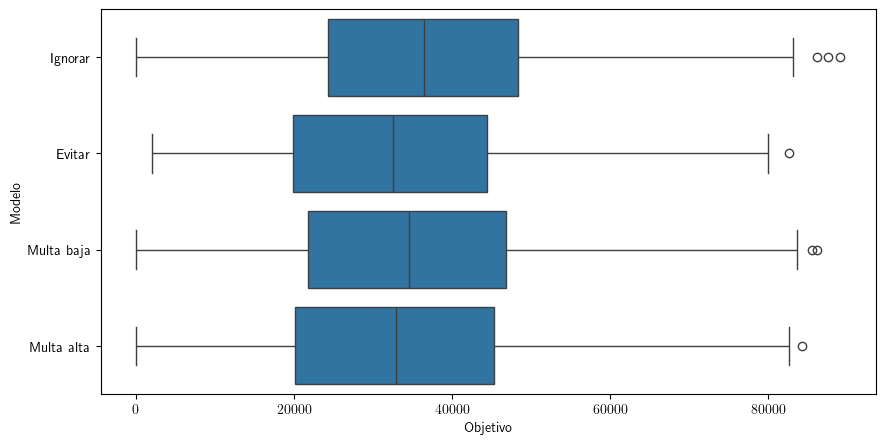

In [19]:
fig = boxplot(
    [res.objetivos for res in dict_resultados.values()],
    dict_resultados.keys(),
    xlabel="Objetivo",
    ylabel="Modelo",
)

fig.savefig("graficos/exp4/distribucion_objetivo.pdf")

In [18]:
[pd.Series(res.objetivos).mean() for res in dict_resultados.values()]

[np.float64(37054.45701655239),
 np.float64(33038.45500153286),
 np.float64(35049.820159475865),
 np.float64(33361.02989807249)]

### Tiempo

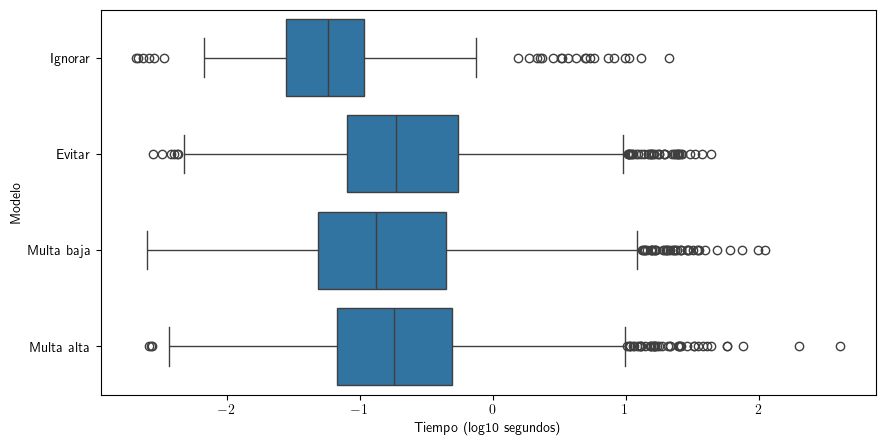

In [24]:
import math


fig = boxplot(
    [[math.log(t, 10) for t in res.tiempos] for res in dict_resultados.values()],
    dict_resultados.keys(),
    xlabel="Tiempo (log10 segundos)",
    ylabel="Modelo",
)

fig.savefig("graficos/exp4/distribucion_tiempo.pdf")

In [26]:
{label: sum(resultados.tiempos) / 60 for label, resultados in dict_resultados.items()}

{'Ignorar': 3.2875765561833985,
 'Evitar': 20.724745733883328,
 'Multa baja': 31.012644971866724,
 'Multa alta': 33.8082103341666}